![課題_スクリーンショット](../img/課題.png)

## ライブラリ読み込み

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from prophet import Prophet

## テーブルの読み込みと日付データ型への変更

,ds,Weather,Bargain,y
0,1990-01-05,0.0,0.0,58507.0
1,1990-01-06,0.0,0.0,49088.0
2,1990-01-07,0.0,0.0,50066.0


,ds,Weather,Bargain,y
1454,1993-12-29,0.0,0.0,94771.0
1455,1993-12-30,0.0,0.0,108693.0
1456,1993-12-31,0.0,0.0,111898.0


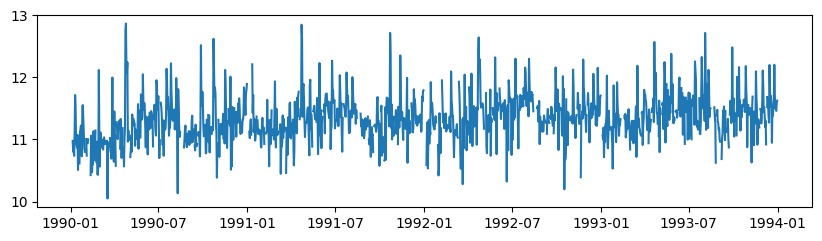

In [21]:
df = pd.read_excel('../data/apparel.xlsx')

display(df.head(3))
display(df.tail(3))

df['ds'] = pd.to_datetime(df['ds'])

df['y'] = np.log(df['y'])

plt.figure(figsize=(10,2.5),dpi=100)
plt.plot(df['ds'], df['y'])

## 長期的なトレンドのみ予測

17:23:26 - cmdstanpy - INFO - Chain [1] start processing
17:23:26 - cmdstanpy - INFO - Chain [1] done processing


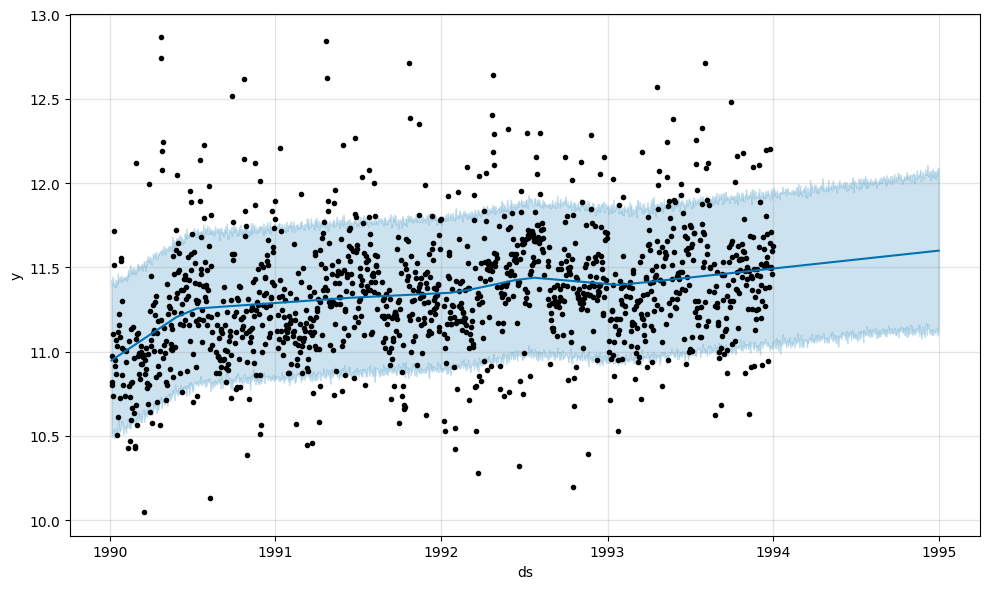

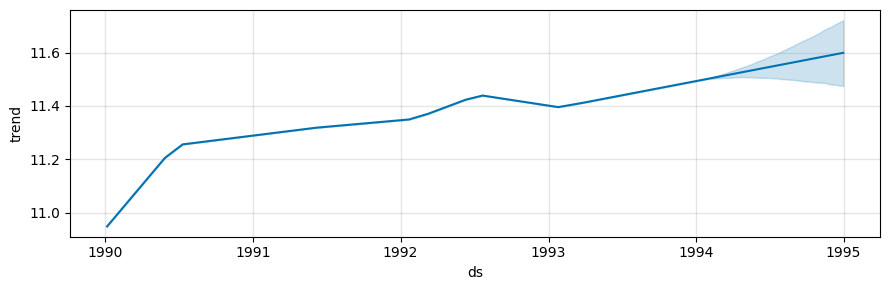

In [12]:
m = Prophet(weekly_seasonality = False, yearly_seasonality = False)
m.fit(df)

#予測する日付を生成
future = m.make_future_dataframe(periods=365)

#予測を実施
forecast = m.predict(future)

#実際のデータとトレンドを重ね合わせて表示
fig1 = m.plot(forecast)

#トレンドのみ表示
fig2 = m.plot_components(forecast)

## 月,週のトレンドを加味した予測

17:32:32 - cmdstanpy - INFO - Chain [1] start processing
17:32:32 - cmdstanpy - INFO - Chain [1] done processing


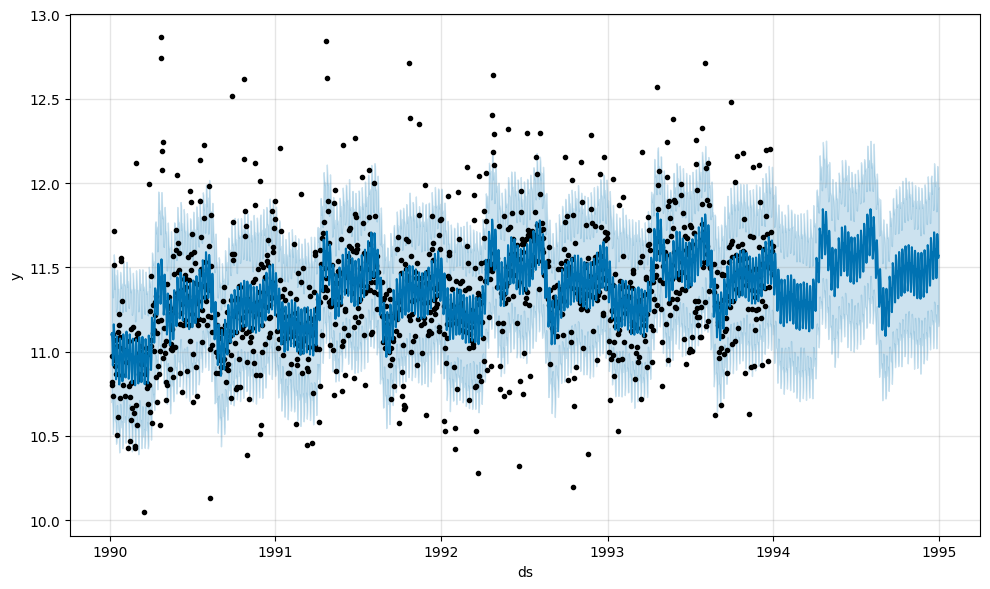

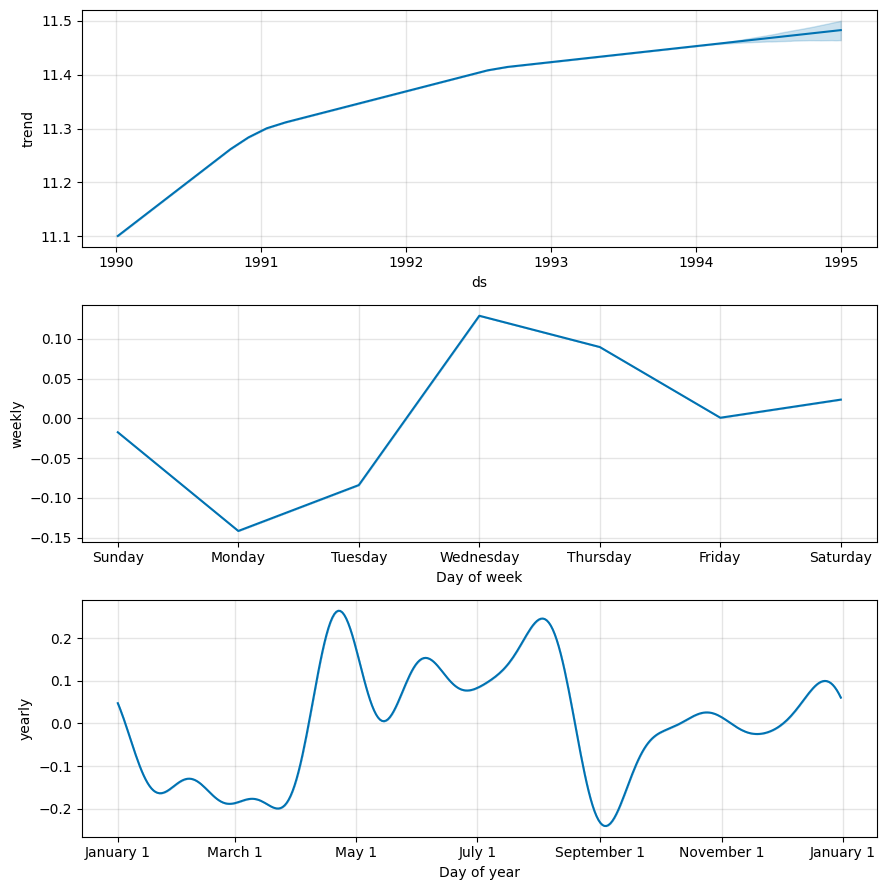

In [19]:
#モデルの生成
m = Prophet(weekly_seasonality = True, yearly_seasonality = True)
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)